## Data Analysis Interview Challenge

In [104]:
#Importing Libraries
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style('whitegrid')
sns.set(color_codes='dark')
%matplotlib inline  

In [105]:
#Import data
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


### Part 1 ‐ Exploratory data analysis
Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 

In [106]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [107]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


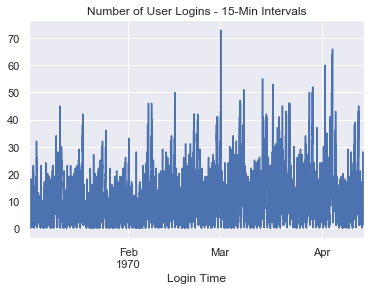

In [108]:
logins = logins.sort_values('login_time').set_index('login_time')
logins['count'] = 1
logins = logins.resample('15T').sum().fillna(0)
logins.plot(legend=False)
plt.title('Number of User Logins - 15-Min Intervals')
plt.xlabel('Login Time')
plt.show()

There certainly seems to be a rhythm to the data, even with the usual spikes. It is too hard to see the daily logins.

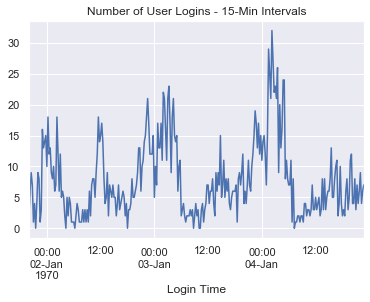

In [109]:
logins.head(300).plot(legend=False)
plt.title('Number of User Logins - 15-Min Intervals')
plt.xlabel('Login Time')
plt.show()

Users login the most in the evening from about 8pm to 5am and around noon time from about 11am to 2pm. There are very few logins in the morning between 6am and 10am. We can double check and know the exact hour through a bar plot.

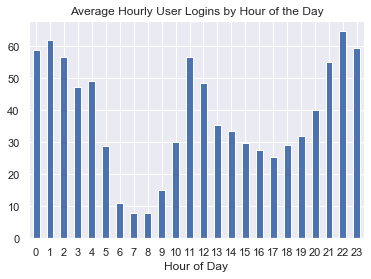

In [110]:
hourly_logins = logins.resample('1H').sum()
hourly_logins['hour'] = hourly_logins.index.hour
hourly_logins.groupby('hour').mean().plot(kind='bar', legend=False)
plt.title('Average Hourly User Logins by Hour of the Day')
plt.xlabel('Hour of Day')
plt.xticks(range(0,24), rotation=0)
plt.show()

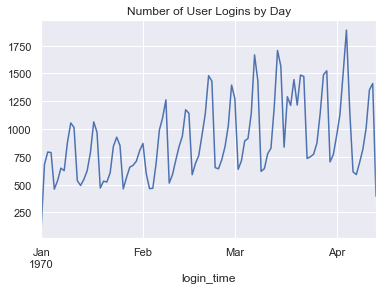

In [111]:
daily_logins = logins.resample('1D').sum()
daily_logins.plot(legend=False)
plt.title("Number of User Logins by Day")
plt.show()

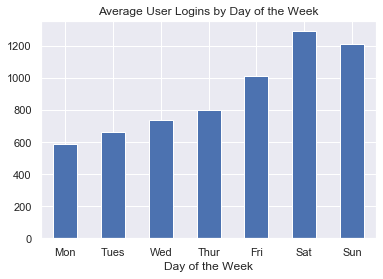

In [112]:
daily_logins['dayofweek'] = daily_logins.index.dayofweek
labels = ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
ax = daily_logins.groupby('dayofweek')['count'].mean().plot(kind='bar', legend=False)
ax.set_xticklabels(labels, rotation=0)
plt.title('Average User Logins by Day of the Week')
plt.xlabel('Day of the Week')
plt.show()

Analysis of aggregate of login counts on 15 minute intervals
There are high login counts peaking from Midnight-5AM. Then there is a dip with lowest counts from 5-10AM. From 10AM-1PM, there is a gradual increase and decrease with a peak at 11:15-11:30AM. From 1-8PM, there's a plateau of login counts. Finally, 8PM-Midnight, there are high counts.
The lowest activity range is in the morning 5-10AM. The highest activity range is 8PM-5AM. Around noon, there is a peak of activity, but it maintains a plateau of logins until the high demand at night.

### Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

##### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?


Toll usage is the key measure for this experiment.  Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is activity in both cities. I 'd want to track which toll is being used (into Gotham or Metropolis), the day, the night and weekend.

##### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
###### a. how you will implement the experiment

I will track toll-bridge usage, and I'd expect to see an increase in toll-bridge use.  The activity of driver rides will be tracked to see how much it increases or decreases, which will be compared to the data before this implementation of reimbursements. 

###### b. what statistical test(s) you will conduct to verify the significance of the observation

I would use the hypothesis test in the collected data with the proposed change against the data before the reimbursement. A comparison of the mean values of rides will be sufficient with a significance level of 5%. The null hypothesis would state that the means are the same before and after, while the alternative hypothesis would indicate that the mean after is more significant than before enacting this change. 

###### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
I would interpret that the toll reimbursement did not have any significant effect on increasing the activity of drivers If the null hypothesis cannot be rejected.  If the null hypothesis is rejected, the alternative can be accepted and interpreted as increasing the activity of drivers.
I would recommend continuing to extend this reimbursement if the null hypothesis is rejected.  But, I would also suggest keeping to look at the activities since this increase.  A decrease could occur if the new factor of this toll reimbursement fades away. If for some reason drivers decide the toll does not do enough for the far drives and revert to localizing to their cities of choice.

### Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

In [113]:
text=open('ultimate_data_challenge.json','r')
x = text.read()
y = json.loads(x)

users = pd.DataFrame(y)
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


**Data description**
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [114]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


There are NaN values in some of the columns. Since the missing numbers are not too high, I will impute the mean values for the avg_rating columns and the phone column. 

In [115]:
# Impute for NaN values
values = {'avg_rating_by_driver': users['avg_rating_by_driver'].mean(), 
          'avg_rating_of_driver': users['avg_rating_of_driver'].mean(),
          'phone': 'iPhone'}
users = users.fillna(value=values)

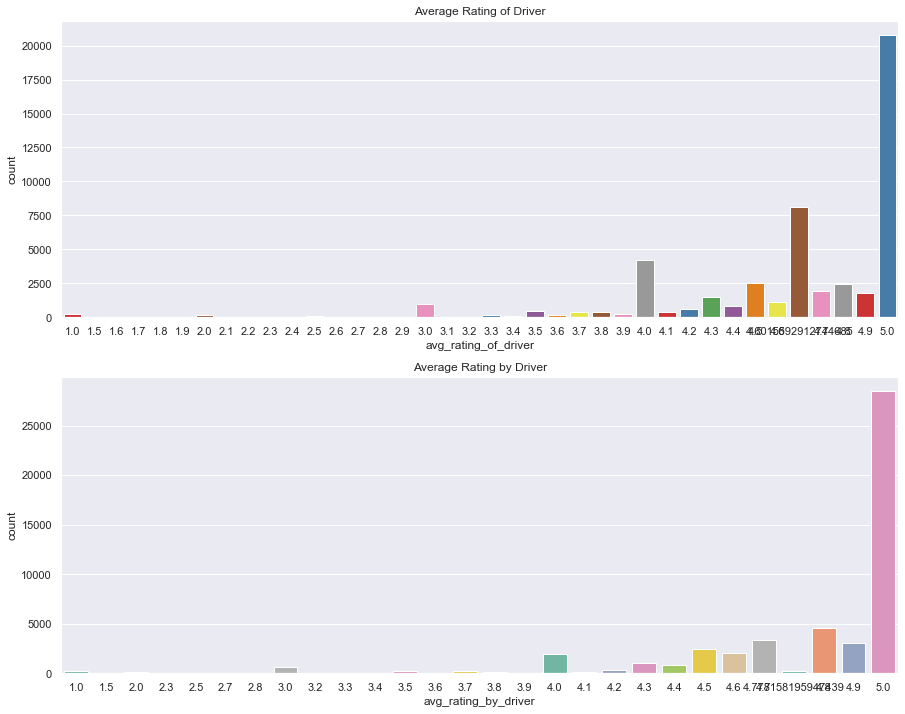

In [116]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
sns.countplot(x="avg_rating_of_driver", data=users, ax=ax[0], palette="Set1")
ax[0].set_title('Average Rating of Driver')

sns.countplot(x="avg_rating_by_driver", data=users, ax=ax[1], palette="Set2")
ax[1].set_title('Average Rating by Driver')

plt.show()

In [117]:
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(12,6))
    plt.scatter(x, y, marker='.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

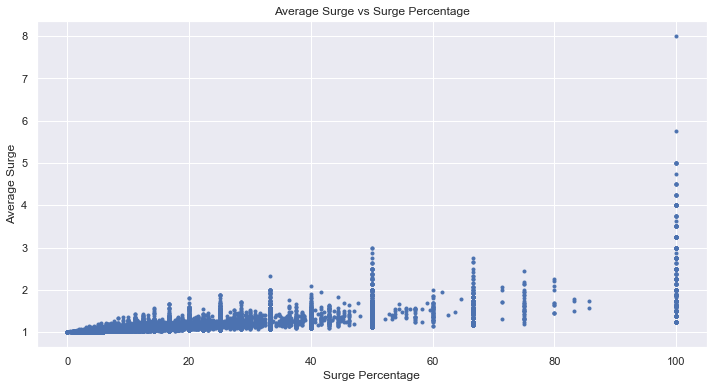

In [118]:
plot_scatter(users.surge_pct, users.avg_surge, 'Surge Percentage', 'Average Surge', 'Average Surge vs Surge Percentage')

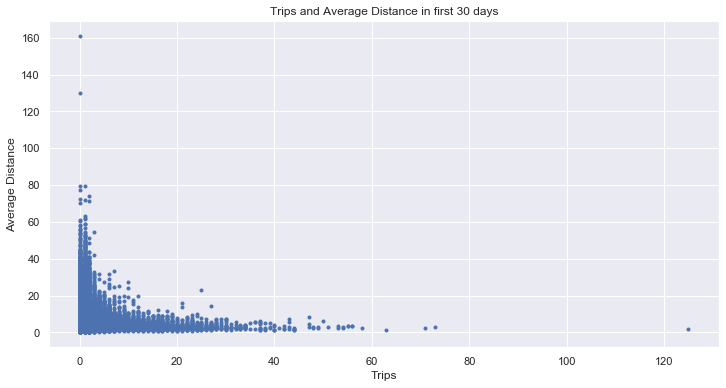

In [119]:
plot_scatter(users.trips_in_first_30_days, users.avg_dist, 'Trips', 'Average Distance', 
             'Trips and Average Distance in first 30 days')

In [120]:
# Convert datetime columns
users.last_trip_date = pd.to_datetime(users.last_trip_date)
users.signup_date = pd.to_datetime(users.signup_date)

# Assuming max of last trip date as data was collected 
data_date = max(users.last_trip_date)

# user is retained from activity 30 days preceding latest date, activity in June
users["retention"] = (users.last_trip_date >= (data_date + datetime.timedelta(-30))).astype(int)

In [121]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


Text(0.5, 1, 'Pearson Correlation of Features')

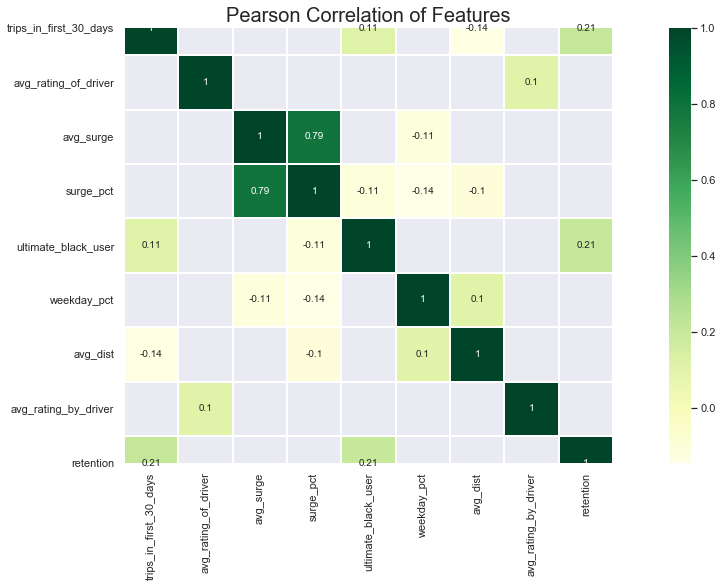

In [122]:
corr = users.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (20,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr[(corr >= 0.1) | (corr <= -0.1)], cmap="YlGn", square=True, ax = ax, annot=True,linewidth=1)

plt.title('Pearson Correlation of Features', y=1, size=20)

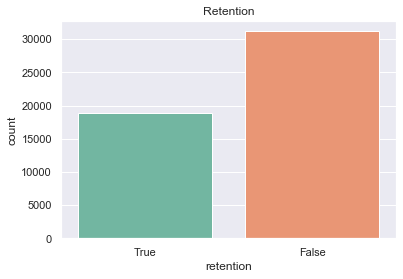

The retention for January users is 37.61%.


In [123]:
ax = sns.countplot(x="retention", data=users, order=[True, False],palette="Set2")
ax.set_title('Retention')

plt.show()

print('The retention for January users is {:.2f}%.'.format(users['retention'].mean()*100))

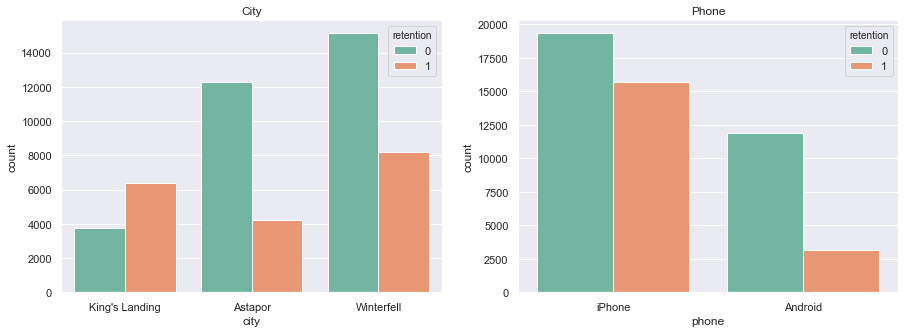

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x="city", hue='retention', data=users, ax=ax[0], palette="Set2")
ax[0].set_title('City')

sns.countplot(x="phone", hue='retention',data=users, ax=ax[1], palette="Set2")
ax[1].set_title('Phone')

plt.show()

The retention rate of phone is interesting, it shows the difference in the application platform and ease of use. The King's Landing has the least count,but the retention is high. Astapor seems to have the poorest retention.

In [125]:
# Compare means of retention riders
no_retention_mean = users[users['retention']==0].drop('retention', axis=1).mean()
retention_mean = users[users['retention']==1].drop('retention', axis=1).mean()

retention_df = pd.concat([no_retention_mean, retention_mean], axis=1)
retention_df.columns = ['no_retention_mean', 'retention_mean']
retention_df

,no_retention_mean,retention_mean
trips_in_first_30_days,1.658482,3.306318
avg_rating_of_driver,4.606309,4.593679
avg_surge,1.075339,1.073809
surge_pct,8.666739,9.152797
ultimate_black_user,0.299942,0.505052
weekday_pct,60.647032,61.389034
avg_dist,6.207939,5.114788
avg_rating_by_driver,4.787415,4.762801


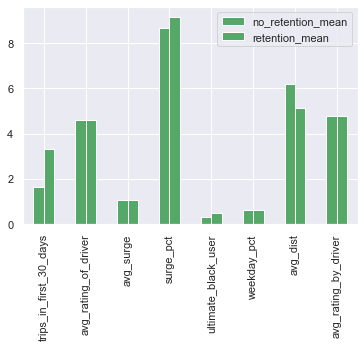

In [126]:
# Plot means of no retention and retention for features
retention_df.loc['weekday_pct'] = retention_df.loc['weekday_pct'].div(100)
retention_df.plot(kind='bar',color="g")
plt.show()

### Modeling
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

As we would like to predict whether a user is retained, it's naturally a binary classification problem.

Let's try the following models:
1. Gradient Boosting  
2. K-Nearest Neighbors
3. Logistic Regression
4. Random Forest


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,roc_curve,auc
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import itertools

In [128]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [129]:
# Drop last trip date for ML modeling
users_ml = users.drop(['last_trip_date'], axis=1)

# Change phone column to 1 for iPhone and 0 for Android
users_ml['phone'] = users_ml['phone'].str.contains('iPhone').astype(int)

# Change ultimate black user column from boolean to int
users_ml['ultimate_black_user'] = users_ml['ultimate_black_user'].astype(int)

# Convert signup_date to amount of days since signup (to date of data collection being 07-01-2014)
users_ml['signup_date'] = abs(users['signup_date'] - data_date)
users_ml['signup_date'] = users_ml['signup_date'].astype(str).str[:3].astype(int)

# One hot encoder for cities
users_ml = pd.get_dummies(users_ml,prefix='is')

In [130]:
users_ml.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,is_Astapor,is_King's Landing,is_Winterfell
0,4,157,4.7,1.10,1,15.4,1,46.2,3.67,5.0,1,0,1,0
1,0,153,5.0,1.00,0,0.0,0,50.0,8.26,5.0,0,1,0,0
2,3,176,4.3,1.00,1,0.0,0,100.0,0.77,5.0,0,1,0,0
3,9,172,4.6,1.14,1,20.0,1,80.0,2.36,4.9,1,0,1,0
4,14,155,4.4,1.19,0,11.8,0,82.4,3.13,4.9,0,0,0,1


In [131]:
X, y = users_ml.drop(['retention', 'avg_surge'], axis=1), users_ml['retention']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)

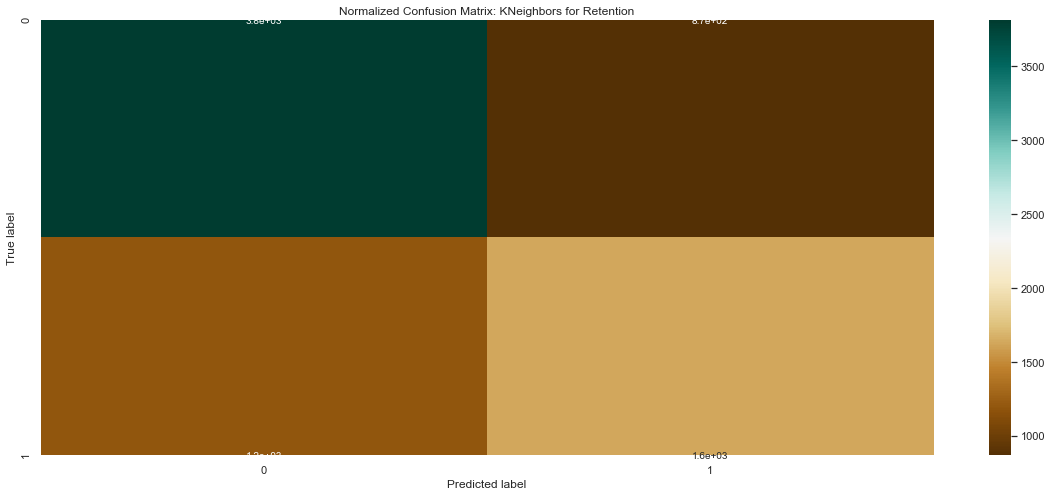

F1 Score: 0.6122295390404515


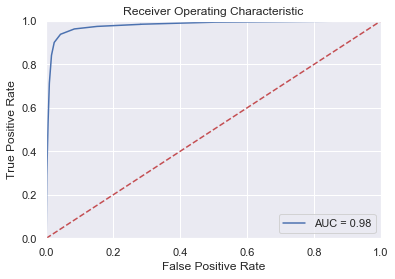

In [134]:
csk = KNeighborsClassifier()
csk.fit(X_train, y_train)
csk.score(X_test, y_test)
y_pred = csk.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
# plot confusion matrix
df_cm = pd.DataFrame(cm)
f, ax = plt.subplots(figsize = (20,8))
sns.heatmap(df_cm, cmap = "BrBG", annot = True, ax = ax)
plt.title('Normalized Confusion Matrix: KNeighbors for Retention')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
    
score = f1_score(y_test, y_pred)
print('F1 Score:', score)

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')    
plt.plot([0, 1], [0, 1],'r--')    
plt.xlim([0, 1])    
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

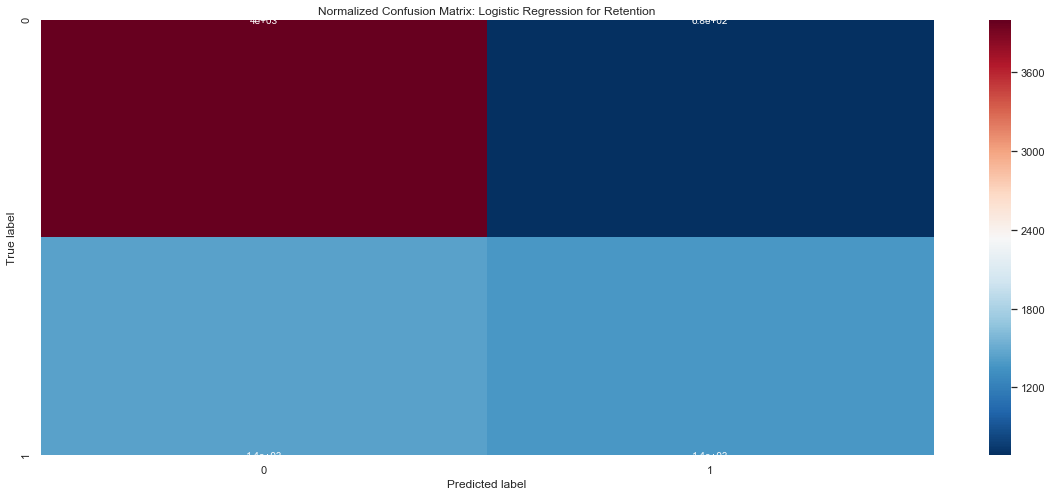

F1 Score: 0.5645227365833674


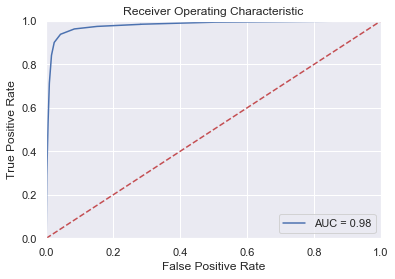

In [135]:
csl = LogisticRegression(solver="lbfgs",max_iter=1000)
csl.fit(X_train, y_train)
csl.score(X_test, y_test)
y_pred = csl.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
# plot confusion matrix
df_cm = pd.DataFrame(cm)
f, ax = plt.subplots(figsize = (20,8))
sns.heatmap(df_cm, cmap = "RdBu_r", annot = True, ax = ax)
plt.title('Normalized Confusion Matrix: Logistic Regression for Retention')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
    
score = f1_score(y_test, y_pred)
print('F1 Score:', score)

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')    
plt.plot([0, 1], [0, 1],'r--')    
plt.xlim([0, 1])    
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/Users/Mtnkgz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


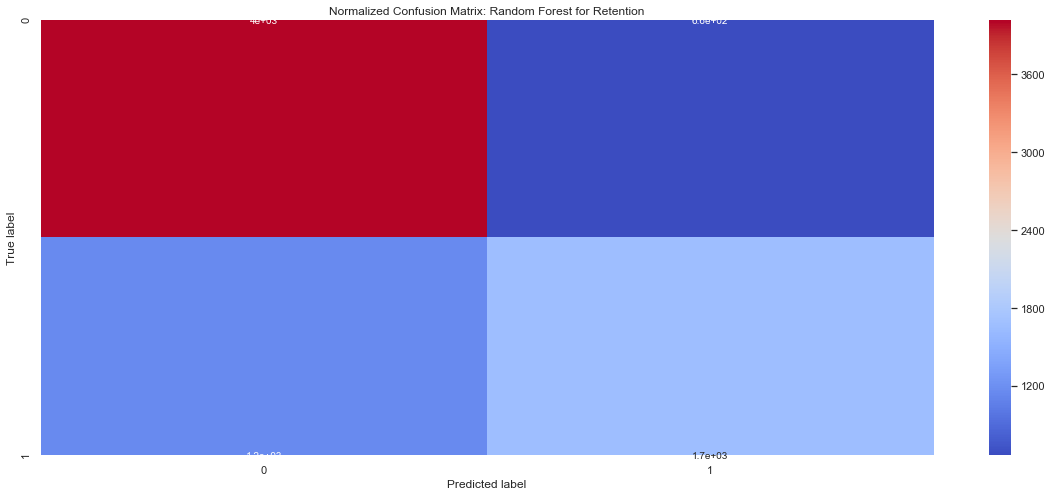

F1 Score: 0.6467275199067779


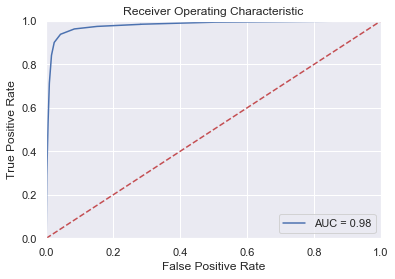

In [136]:
csf = RandomForestClassifier()
csf.fit(X_train, y_train)
csf.score(X_test, y_test)
y_pred = csf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
# plot confusion matrix
df_cm = pd.DataFrame(cm)
f, ax = plt.subplots(figsize = (20,8))
sns.heatmap(df_cm, cmap = "coolwarm", annot = True, ax = ax)
plt.title('Normalized Confusion Matrix: Random Forest for Retention')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
    
score = f1_score(y_test, y_pred)
print('F1 Score:', score)

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')    
plt.plot([0, 1], [0, 1],'r--')    
plt.xlim([0, 1])    
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

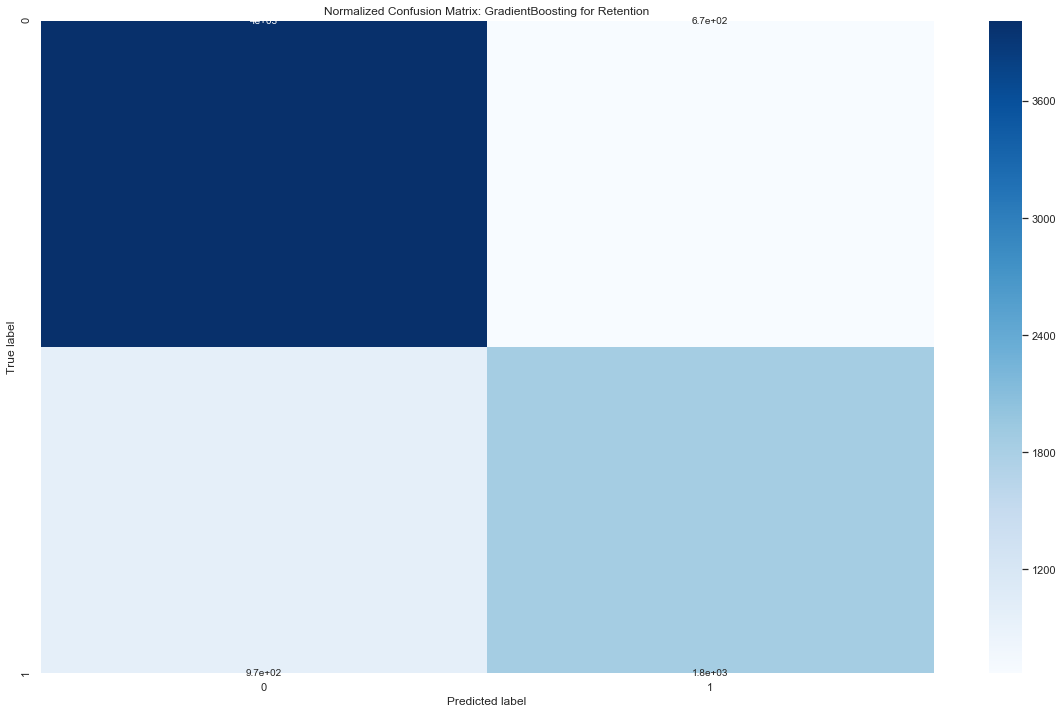

F1 Score: 0.6922788605697152


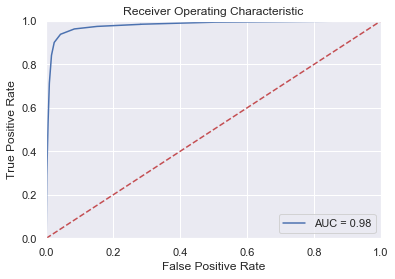

In [133]:
csg = GradientBoostingClassifier()
csg.fit(X_train, y_train)
csg.score(X_test, y_test)
y_pred = csg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
    
# plot confusion matrix
df_cm = pd.DataFrame(cm)
f, ax = plt.subplots(figsize = (20,12))
sns.heatmap(df_cm, cmap = "Blues", annot = True, ax = ax)
plt.title('Normalized Confusion Matrix: GradientBoosting for Retention')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
    
score = f1_score(y_test, y_pred)
print('F1 Score:', score)

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# plot curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')    
plt.plot([0, 1], [0, 1],'r--')    
plt.xlim([0, 1])    
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Looking at the above scores, gradient boosting model has the best F1 score. This model can be a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system.**

**In addition, we can look at the feature importances of gradient boosting model, the most import features are: avg_rating_by_driver, surge_pct, weekday_pct and city.**

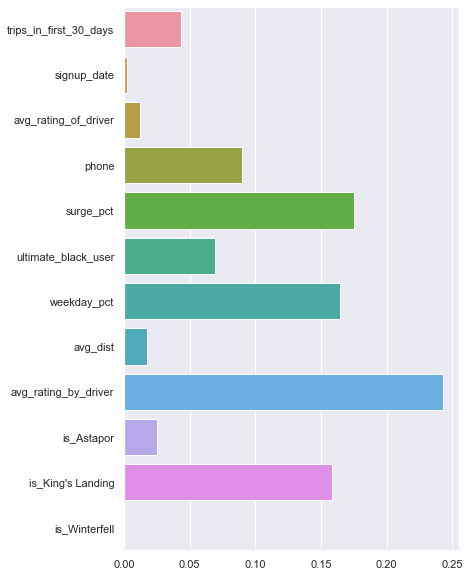

In [143]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=csg.feature_importances_)